# D. MÔ HÌNH HỌC MÁY

Trước tiên cần import một số thư viện cần thiết

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv("./datasets/HR_Analytics.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# I. BÀI TOÁN ĐẶT RA

**Bài toán đặt ra:**

Dự đoán liệu rằng nhân viên có nguy cơ nghỉ việc ở công ty đang làm việc hay không?

**Giới thiệu chung:**

- Trong học máy, học có giám sát là một nhóm các thuật toán phổ biến trong lĩnh vực này và một trong những vấn đề quan trọng của học có giám sát là phân loại/phân lớp(classification problem).
- Có 2 dạng classification thường gặp là: binary classification và multiclassification, và trong bài toán mà nhóm đặt ra thì đây là một vấn đề binary classification: từ những thuộc tính đầu vào của một nhân viên như tổng số năm làm việc, mức lương, sự hài lòng về môi trường làm việc, ... dự đoán rằng nhân viên đó nguy cơ nghỉ làm ở công ty hiện tại hay không(Công ty có bị mất mát nhân viên hay không) (0: Không/ 1: Có).
- Nhóm sẽ tạo một mô hình logistic regression cho bài toán phân loại nhị phân.

# II. TIỀN XỬ LÝ DỮ LIỆU

## 1. Mã hóa các thuộc tính dạng danh mục về dạng số

In [22]:
#lọc ra các thuộc tính dạng danh mục
cat_cols=df.select_dtypes(exclude=['int32','int64','float32','float64'])
cat_cols.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [23]:
#thống kê số lượng các giá trị riêng biệt trong mỗi thuộc tính danh mục ở trên
count_uvalue=[cat_cols[c].nunique() for c in list(cat_cols.columns)]
count_uvalue

[2, 3, 3, 6, 2, 9, 3, 1, 2]

Một vài nhận xét như sau:
- Cột Over18 chỉ chứa 1 loại giá trị duy nhất là 'Y' chứng tỏ cột này sẽ không ảnh hưởng đến kết quả của việc huấn luyện mô hình.
- Có 3 thuộc tính là Attrition, Gender, và OverTime là có 2 loại giá trị khác nhau, do đó với các thuộc tính này chúng ta có thể mã hóa bằng cách gán nhãn 0/1 cho chúng.
- Đối với các thuộc tính có nhiều hơn 2 loại giá trị, chúng ta sẽ má hõa bằng one-hot vector, lý do sử dụng one-hot mà không dùng ordinal hay label để tránh xảy ra hiện tượng bias do mã hóa thành các giá trị lớn nếu số lượng giá trị lớn.

In [24]:
#xóa thuộc tính 'Over18'
df.drop(['Over18'],axis=1, inplace=True)

In [25]:
#chuyển các thuộc tính danh mục chỉ có 2 giá trị riêng biệt về dạng số bằng cách gán nhãn
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Attrition']=label_encoder.fit_transform(df['Attrition'])
df['OverTime']=label_encoder.fit_transform(df['OverTime'])
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [26]:
#chuyển các thuộc tính danh mục có hơn 2 giá trị riêng biệt về dạng số bằng one-hot vector
df=pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 
                               'JobRole', 'MaritalStatus'])

In [27]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,1,0,0,0,0,0,0,0,1,0


## 2. Loại những thuộc tính không có ý nghĩa cho bài toán

**Cách 1:**
- **Cách thô sơ nhất có thể nghĩ đến là cách loại các thuộc tính có thể thấy ngay về mặt ý nghĩa là không cần thiết cho bài toán phân loại:** Ví dụ thuộc tính 'Over18' được loại bỏ ở trên do chúng chỉ mang một giá trị 'yes', dễ hiểu khi bộ dữ liệu được cung cấp bởi IBM, có trụ sở ở Mỹ và nước Mỹ chỉ cho phép đi làm khi đủ 18 tuổi trở lên. Ngoài ra khi nhìn vào bảng ý nghĩa các thuộc tính mà nhóm đã cung cấp ở phần thu thập dữ liệu thì cột 'StandardHours' cũng sẽ không có ý nghĩa cho bài toán vì cột này mang cùng một giá trị cho tất cả nhân viên là giờ làm chuẩn mà họ phải đi làm, có thể xóa thuộc tính này đi.

In [28]:
#xóa 'StandardHours'
df.drop(['StandardHours'],axis=1,inplace=True)

**Cách 2:**
- **Cách tiếp theo là sử dụng giá trị correlations giữa từng biến biến độc lập với biến phụ thuộc:**
  + Correlation là một thuật ngữ thống kê được sử dụng phổ biến đề cập đến mức độ liên quan của hai biến để có mối quan hệ tuyến tính với nhau hay không.
  + Correlation cao nhất có giá trị là 1 (hai biến hoàn toàn có quan hệ tuyến tính) và thấp nhất dần nếu hai biến càng không có quan hệ tuyến tính.
  + Nhóm sẽ tạo một dataframe tên là 'correlations' chứa các correlations của từng cột trong bộ dữ liệu để dễ dàng nhận xét mức độ tương quan giữa các biến.

In [29]:
correlations=df.corr()
correlations

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,-0.036311,0.024287,...,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,0.029453,-0.006846,...,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,-0.011716,0.023381,...,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,-0.001851,0.031131,...,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,-0.016547,0.016775,...,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.022556,0.035179,...,-0.019722,-0.035058,-0.014350,-0.013983,-0.017686,0.023263,0.006255,-0.025149,0.053933,-0.035189
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,0.000508,-0.049857,...,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035
Gender,-0.036311,0.029453,-0.011716,-0.001851,-0.016547,NaN,0.022556,0.000508,1.000000,-0.000478,...,0.067793,-0.033880,-0.065197,-0.006121,0.009745,-0.005348,-0.028877,0.046076,-0.007804,-0.032752
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,-0.000478,1.000000,...,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,-0.006150,0.036432,-0.033436


Việc trực quan sẽ giúp khả năng đánh giá được dễ dành hơn.

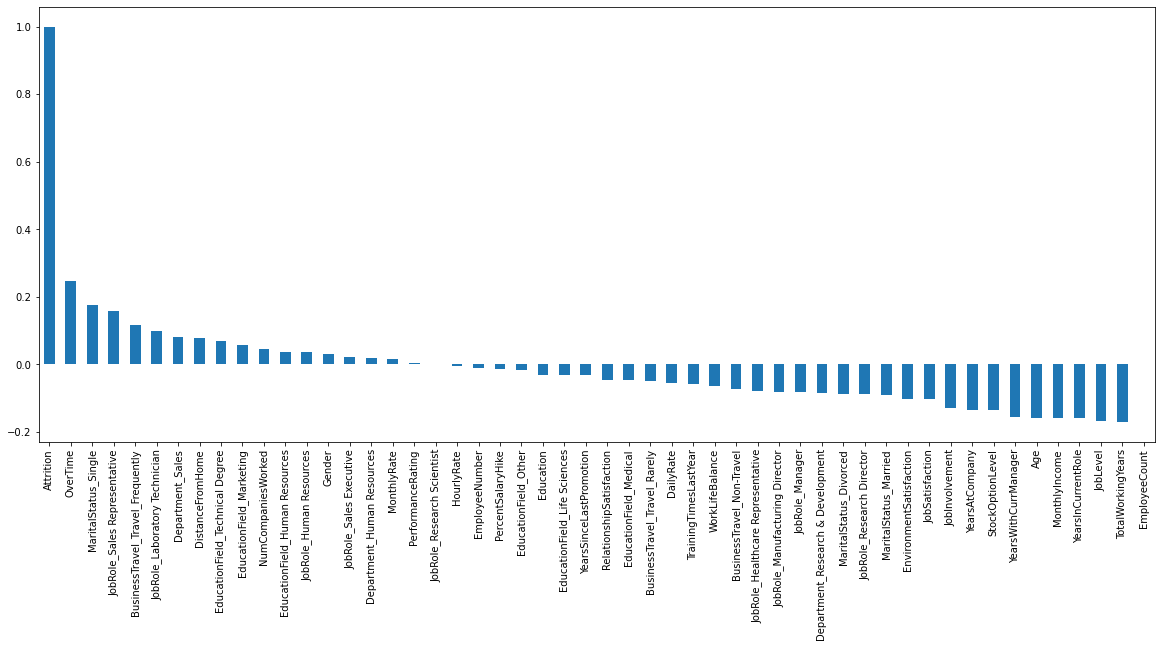

In [30]:
plt.figure(figsize=(20,8))
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

Dễ nhận thấy ngay là 'EmployeeCount' hoàn toàn không có quan hệ với 'Attrition'.

In [31]:
df.drop(['EmployeeCount'],axis=1,inplace=True)

In [32]:
correlations.drop(['EmployeeCount'],axis=1,inplace=True)

In [33]:
correlations.drop(['EmployeeCount'],axis=0,inplace=True)

**Cách 3:**
- Sử dụng correlations giữa các biến độc lập với nhau:
  + Hai biến độc lập khi có giá trị correlation càng cao thì chứng tỏ chúng càng mang thông tin giống nhau cho ngữ cảnh của bài toán.
  + Do đó khi hai biến độc lập có correlation cao thì có thể chọn một trong hai để áp dụng vào việc huấn luyện mô hình.

In [34]:
threshold=0.7
cols=list(correlations.columns)
cols_at_index=list(correlations.index)
feature1, feature2, correlation=[], [], []
for i in range(len(cols)):
    for j in range(len(correlations)):
        if correlations[cols[i]][j]>=threshold and correlations[cols[i]][j]<1 and cols_at_index[j] not in feature1:
            feature1.append(cols[i])
            feature2.append(cols_at_index[j])
            correlation.append(correlations[cols[i]][j])
new_df=pd.DataFrame({'feature1':[feature1[i] for i in range(len(feature1))],
                     'feature2':[feature2[i] for i in range(len(feature2))],
                     'correlation':[correlation[i] for i in range(len(correlation))],})
new_df

,feature1,feature2,correlation
0,JobLevel,MonthlyIncome,0.950300
1,JobLevel,TotalWorkingYears,0.782208
2,MonthlyIncome,TotalWorkingYears,0.772893
3,PercentSalaryHike,PerformanceRating,0.773550
4,YearsAtCompany,YearsInCurrentRole,0.758754
5,YearsAtCompany,YearsWithCurrManager,0.769212
6,YearsInCurrentRole,YearsWithCurrManager,0.714365
7,Department_Human Resources,JobRole_Human Resources,0.904983
8,Department_Sales,JobRole_Sales Executive,0.808869


- **TotalWorkingYears, JobLevel và MonthlyIncome:** Có giá trị correlation rất cao. Chọn giữ lại MonthlyIncome.
- **PercentSalaryHike và PerformanceRating:** Có giá trị correlation là 0.77. Chọn giữ lại  PerformanceRating.
- **YearsAtCompany, YearsInCurrentRole, và YearsWithCurrManager:** Có giá trị correlation cao. Chọn giữ lại YearsAtCompany.
- **Department_Human Resources và JobRole_Human Resources:** Có giá trị correlation là 0.9. Chọn giữ lại JobRole_Human Resources.
- **Department_Sales và JobRole_Sales Executive:** Có giá trị correlation là 0.8. Chọn giữ lại JobRole_Sales Executive.

In [35]:
df.drop(['TotalWorkingYears', 'JobLevel', 'PercentSalaryHike', 'YearsInCurrentRole',
         'YearsWithCurrManager', 'Department_Human Resources', 'Department_Sales'],axis=1,inplace=True)

In [36]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,2,0,94,3,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,2,3,1,61,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,4,1,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,5,4,0,56,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,7,1,1,40,3,...,1,0,0,0,0,0,0,0,1,0


## Xử lý các giá trị thiếu

Thống kê số lượng giá trị thiếu của mỗi cột

In [37]:
df.isnull().sum()

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeNumber                       0
EnvironmentSatisfaction              0
Gender                               0
HourlyRate                           0
JobInvolvement                       0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsSinceLastPromotion              0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Dev

Bộ dữ liệu không tồn tại bất kì giá trị thiếu nào trong tất cả các cột thuộc tính. Vậy có thể bỏ qua bước này.

## Feature Scaling

- Khi khoảng giá trị giữa 2 thuộc tính quá cách xa nhau thì việc mô hình hóa cũng như trực quan mối quan hệ có thể gặp khó khăn, do đó phải thực hiện kĩ thuật 'Feature Scaling' hay việt hóa là 'Co giãn thuộc tính'.
- Có 3 phương pháp feature scaling chính là:
  + Standardisation (Chính quy hóa): Làm cho tập dữ liệu có trung bình là 0 và độ lệch chuẩn là 1 và được áp dụng cho hầu hết các trường hợp cần feature scaling.
  + Normalisation (Tiêu chuẩn hóa): Làm cho các giá trị trong tập dữ liệu thuộc đoạn [0, 1] và được áp dụng nếu tập dữ liệu tuân theo phân phối chuẩn.
  + MinMax Scaler: Đưa các giá trị về khoảng giữa 2 giá trị min và max trong miền giá trị của thuộc tính, có thể là đoạn [-1, 0], [0, 1], [-1, 1],...
- Trong bài này nhóm chọn phương pháp Standardisation để scaling khoảng giá trị của thuộc tính về khoảng gần hơn với giá trị của tập y.
- **Nhóm sẽ không cài đặt ở bước này mà sẽ tích hợp việc feature scaling vào Pipeline của thư viện sklearn trong bước xây dựng mô hình về sau.**

# III. XÂY DỰNG MÔ HÌNH HỌC MÁY

## 1. Logistic Regression cho Phân loại nhị phân

**Mô tả bài toán:**
- Mục tiêu của bài toán phân loại nhị phân là dự đoán xác suất thuộc về một trong hai lớp cần phân lớp của một biến phụ thuộc dựa vào các biến độc lập(hay còn gọi là thuộc tính).
- Trong bộ dữ liệu này chúng ta sẽ thử dự đoán **xác suất thuộc về lớp 0 hoặc 1 của biến Attrition dựa vào các thuộc tính độc lập khác của một người nhân viên.**

**Cost Function:**
- Bắt đầu với việc xây dựng một hypothesis tương tự như bài toán linear regression: $h_{\theta}$(x): $\theta_{0}$ + $\theta_{1}$x với $\theta_{i}$ (i=0,1) là các tham số (parameters) của công thức hồi quy và $\theta_{0}$ còn đươc gọi là hệ số tự do.
- Tuy nhiên sử dụng đường thẳng tuyến tính là không phù hợp cho mục tiêu của bài toán khi giá trị dự đoán cần thuộc vào một trong hai lớp là 0 hoặc 1, nhưng với một đường thẳng tuyến tính thì $h_{\theta}$(x) có thể lớn hơn 1 và nhỏ hơn 0.
- Lúc này cần 1 giải pháp để giá trị dự đoán có thể nằm trong khoảng 0 đến 1 => truyền hypothesis qua một hàm sigmoid mà giá trị trả về của một hàm sigmoid nằm trong khoảng 0 đến 1.
Đặt z=$h_{\theta}(x)$
$$sigmoid(z)=-\frac{1}{1+e^{-z}}\$$

(Hình ảnh minh họa cho hàm sigmoid sẽ được trình bày kĩ trong file báo cáo của nhóm).

- Lúc này, ta có giá trị dự đoán y_hat=sigmoid(z) nằm trong khoảng từ 0 đến 1 hay nói cách khác đây chính là giá trị xác suất mà y_hat thuộc về một trong hai lớp với điều kiện cho trước là các thuộc tính đầu vào khác.
- Thông thường, quy ước giá trị trả về của hàm sigmoid biểu thị cho xác suất thuộc lớp 1 của y_hat: y_hat=sigmoid(z)=P(y=1|x) => P(y=0|x) = 1 - y_hat = 1 - P(y=1|x).
- Vậy làm thế nào có thể quy định lớp mà y_hat thuộc về?
  + Chúng ta sẽ sử dụng một giá trị ngưỡng mà nếu y_hat lớn hơn hoặc bằng ngưỡng này sẽ thuộc về lớp 1, ngược lại thuộc về lớp 0.
  + Ngưỡng giá trị thông thường sẽ là 0.5, điều này tương ứng với việc nếu z>=0 thì y_hat thuộc về lớp 1 (do sigmoid(z>=0)>=0.5).
- Sau khi có được tập các giá trị dự đoán của các mẫu đầu vào, để đánh giá xem hypothesis đã tốt hay chưa chúng ta xây dựng một hàm chi phí để tính toán độ sai lệch giữa giá trị dự đoán và giá trị thực tế.

$$J(\theta)= -\frac{1}{N}\sum_{i=1}^{N}(y_{i}\log(\hat{y}_{i}) + (1 - y{i})\log(1 - \hat{y}_{i}))$$

với $\hat{y}_{i}$=${y\_hat}_{i}$
- Do càng nhiều giá trị dự đoán giống với giá trị thực tế càng tốt nên $J(\theta)$ có giá trị càng bé càng tốt.

**Gradient Descent:**
- Với mục tiêu là cực tiểu hóa hàm chi phí $$J(\theta)= -\frac{1}{N}\sum_{i=1}^{N}(y_{i}\log(\hat{y}_{i}) + (1 - y{i})\log(1 - \hat{y}_{i}))$$
- Thì các tham số $\theta$ sẽ là những giá trị mà chúng ta cần phải thay đổi để tối ưu hóa Cost Function, và một trong những cách để thực hiện việc này là thuật toán Gradient Descent.
- Thuật toán được thực hiện như sau:
**Trong mỗi lần lặp cập nhật một cách đồng thời các tham số ${\theta}_{j}$ theo công thức như sau:** $$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)}$$

Trong đó: alpha là 'learning rate' giúp việc học được tối ưu hơn.

## 2. Sử dụng Pipeline và Các độ đo được dùng để đánh giá mô hình

**Pipeline:**
- Pipeline là một công cụ giúp kết hợp nhiều bước xử lý dữ liệu và huấn luyện mô hình thành một quy trình hoàn chỉnh.
- Các bước để thực hiện xây dựng một mô hình học máy sẽ được xếp tuần tự trong một đối tượng Pipeline (có thể xem như một đường ống để dẫn lần lươt đi qua các bước).
- Pipeline giúp tiết kiệm thời gian và tối ưu hóa quá trình huấn luyện mô hình.
**Các độ đo:**
- Các độ đo được nhóm sử dụng trong bài này sẽ là:
  + Accuracy score.
  + Precision.
  + Recall.
  + F1-score.

**(Hình ảnh về pipeline và định nghĩa các độ đo được nhóm trình bày trong file báo cáo đính kèm).**

## 3. Cài đặt

**LƯU Ý: Lý do cụ thể cho các bước thực hiện dưới đây sẽ được nhóm giải thích một cách chi tiết trong file báo cáo đi kèm.**

**Khai báo các thư viện cần thiết:**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

**Tạo tập các thuộc tính đầu vào và tập các biến mục tiêu từ bộ dữ liệu ban đầu.**

In [39]:
X=np.array(df.drop(['Attrition'],axis=1))
y=np.array(df['Attrition'])

In [40]:
X

array([[  41, 1102,    1, ...,    0,    0,    1],
       [  49,  279,    8, ...,    0,    1,    0],
       [  37, 1373,    2, ...,    0,    0,    1],
       ...,
       [  27,  155,    4, ...,    0,    1,    0],
       [  49, 1023,    2, ...,    0,    1,    0],
       [  34,  628,    8, ...,    0,    1,    0]], dtype=int64)

In [41]:
y

array([1, 0, 1, ..., 0, 0, 0])

**Chia tập dự liệu thành tập huấn luyện và tập kiểm tra:**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [43]:
print(X_train.shape)
print(X_test.shape)

(1176, 43)
(294, 43)


**Cài đăt mô hình:**

In [44]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:1},max_iter=10000))
])

pipe.fit(X_train, y_train)
pipe.named_steps['classifier'].get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 1},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Giải thích Pipeline: Xây dựng một pipeline thực hiện các bước sau:
- Đầu tiên tạo một thành phần 'scaler' thực hiện việc chuẩn hóa dữ liệu như đã đề cập ở mục cuối của phần tiền xử lý dữ liệu. Thành phần này sử dụng lớp StandardScaler() được cung cấp bởi sklearn để thực hiện chuẩn hóa giá trị của từng cột trong X theo phương pháp Standardisation (Chính quy hóa).
- Tiếp theo là tạo một bộ phân lớp 'classifier' để thực hiện việc phân loại các mẫu đầu vào về một trong hai lớp của bài toán phân loại nhị phân. Bộ phân lớp này áp dụng thuật toán Logistic Regression mà nhóm đã giới thiệu trước đó (Các tham số trong lớp LogisticRegression sẽ được giải thích trong file báo cáo đi kèm).

In [46]:
#dự đoán
predictions=pipe.predict(X_test)
predictions

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

**Đánh giá mô hình:** Trước tiên xem xét giá trị của accuracy score.

In [47]:
acc_score=accuracy_score(predictions, y_test)
print(acc_score)

0.8775510204081632


Accuracy Score đạt khá cao nhưng liệu đã đủ tốt cho việc đánh giá mức độ hiệu quả của mô hình?

Hãy cùng xem xét thêm về các độ đo khác.

In [48]:
report=classification_report(predictions, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       267
           1       0.41      0.74      0.53        27

    accuracy                           0.88       294
   macro avg       0.69      0.82      0.73       294
weighted avg       0.92      0.88      0.89       294



Đúng là đừng nên vội tin những điều màu hồng trước mắt 😃

- Các độ đo khác như Precision, Recall và F1-score đều rất thấp ở lớp 1 hơn so với ở lớp 0, chứng tỏ mô hình dự đoán chưa tốt cho các trường dự đoán mẫu thuộc thực tế thuộc về lớp 1 (hay nói trong ngữ cảnh này là các mẫu thuộc về lớp tiêu cực).
- Và điều này làm chúng ta có thể nghĩ đến trường hợp mất cân bằng dữ liệu (imbalanced data).

**Kiểm tra tính cân bàng của dữ liệu:**

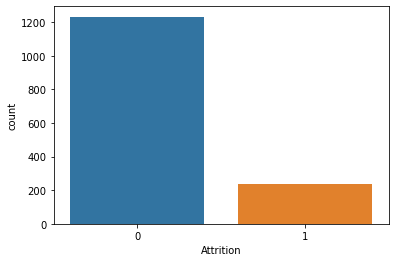

In [51]:
sns.countplot(data=df,x=df['Attrition']);

- Rõ ràng xảy ra hiện tượng mất cân bằng giữa hai lớp 0 và 1 khi số lượng các phần tử thuộc lớp 0 trong bộ dữ liệu này nhiều xấp xỉ gấp 6 lần số lượng các phần tử thuộc lớp 1.
- Sự mất cân bằng nghiêm trọng này ảnh hưởng rất lớn đến khả năng dự đoán chính xác của mô hình.

## Mất cân bằng dữ liệu và cách giải quyết

- Dữ liệu bị mất cân bằng hiểu sự phân bổ các mẫu trên các lớp chêch lệch nhau quá lớn dẫn tới việc mô hình chỉ tập trung học những đặc trưng của lớp có số lượng mẫu là chiếm đa số. Làm cho việc dự đoán của mô hình xảy ra tình trạng thiên vị, mất đi tính tổng quát cho dữ liệu thực tế sau này.
- Có nhiều cách xử lý việc mất căn bằng dữ liệu như: Thu thập thêm dữ liệu, các thuật toán tăng mẫu dữ liệu (Oversampling), các thuật toán giảm mẫu dữ liệu (Undersampling), sử dụng trọng số để phạt mô hình cho các giá trị dự đoán của các lớp,....
- Trong phần này nhóm sẽ thực hiện hai phương pháp:
  + Sử dụng **trọng số** để phạt mô hình.
  + Ứng dụng **Thuật toán SMOTE** thuộc nhóm Oversampling.
  
**(Chi tiết về mặt lý thuyết của mất cân bằng dữ liệu, tác hại của mất cân bằng dữ liệu, phương pháp sử dụng trọng số, phương pháp sử dụng thuật toán SMOTE sẽ được nhóm trình bày trong file báo cáo đính kèm).**

**Sử dụng trọng số để tăng việc phạt mô hình nếu dự đoán sai lớp:**

In [49]:
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:2},max_iter=10000))
])

pipe2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=10000,
                                    solver='liblinear'))])

In [52]:
predictions2=pipe2.predict(X_test)

In [55]:
acc_score2=accuracy_score(predictions2, y_test)
print(acc_score2)

0.8741496598639455


In [56]:
report2=classification_report(predictions2, y_test)
print(report2)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       246
           1       0.61      0.62      0.62        48

    accuracy                           0.87       294
   macro avg       0.77      0.77      0.77       294
weighted avg       0.88      0.87      0.87       294



- Với việc sử dụng một trọng số lớn hơn cho lớp 1m đã giúp cải thiện precision và f1-score của lớp 1 một cách đáng kể, cho thấy tính tổng quá của mô hình đã được tăng lên.
- Tuy nhiên các độ đo này vẫn chưa đạt được đến giá trị thật sự tốt lắm cho một bài toán phân loại.
- Và nhóm cũng đã thực nghiệm với nhiều cặp trọng số khác nhau nhưng kết quả thu được tốt nhất và là {0:1, 1:2}.

**Áp dụng thuật toán SMOTE:**

In [ ]:
!pip install imbalanced-learn

In [57]:
from imblearn.over_sampling import SMOTE
X,y=SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)

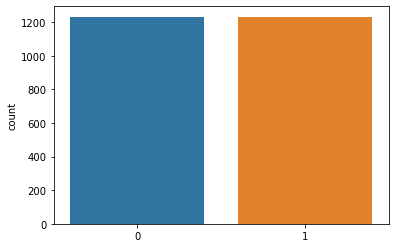

In [58]:
sns.countplot(x=y);

**Chia tập dự liệu thành tập huấn luyện và tập kiểm tra:**

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [60]:
print(X_train.shape)
print(X_test.shape)

(1972, 43)
(494, 43)


**Cài đặt mô hình:**

In [61]:
pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:1},max_iter=10000))
])

pipe3.fit(X_train, y_train)
pipe3.named_steps['classifier'].get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 1},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [62]:
#dự đoán
predictions3=pipe3.predict(X_test)
predictions3

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,

**Đánh giá mô hình:**

In [63]:
#Trước tiên xem xét accuracy score của mô hình
acc_score3=accuracy_score(predictions3, y_test)
print(acc_score3)

0.9048582995951417


In [64]:
#Xem xét chi tiết hơn đến các giá trị metric khác như F1-score hay Recall score
report3=classification_report(predictions3, y_test)
print(report3)

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       268
           1       0.84      0.98      0.90       226

    accuracy                           0.90       494
   macro avg       0.91      0.91      0.90       494
weighted avg       0.92      0.90      0.90       494



- Tất cả các độ đo đều đạt ở mức 90% hoặc hơn, cho thấy sự hiệu quả của thuật toán SMOTE trên bộ dữ liệu này.

# IV. TỔNG KẾT

- Nhóm sẽ không đi sâu vào việc rút ra ý nghĩa nào từ bộ dữ liệu thông qua việc xây dựng mô hình học máy. Điều này được thực hiện ở một giai đoạn khác chính là EDA bộ dữ liệu.
- Thông qua mô hình học máy nhóm chú trọng vào các khía cạnh:
  + Tiền xử lý dữ liệu.
  + Rút trích đặc trưng.
  + Xây dựng mô hình học máy hiệu quả.

- Nhóm đã phát hiện vấn đề về mất cân bằng dữ liệu xảy ra trên bộ dữ liệu này, một điều gây nhiều khó khăn cho quá trình xây dựng các bộ phân lớp.
- Thực hiện các phương pháp để giải quyết vấn đề mất cân bằng dữ liệu và xây dựng mô hình học máy để sử dụng như bộ phân lớp với các độ đo đạt kết quả rất khả quan:
  + Accuracy score: 90%.
  + Precision macro average: 91%.
  + Recall macro average: 91%.
  + F1-Score macro average: 90%.